In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import os

In [2]:
os.chdir('C:/Users/User/Desktop/MAI/CA2')

In [3]:
data = pd.read_excel("C:/Users/User/Desktop/MAI/CA2/salary.xlsx")
data.head()

,salary,years,gender
0,88.0,11,1
1,77.3,6,1
2,75.3,7,0
3,96.4,20,0
4,87.7,8,1


### Model 1 

We will first build a SLR model to predict salary (y) using years (x) as the predictor.
Suppose any new staff who is employed by the company will earn a minimal salary of $50/hour. This means that when  x = 0 ,  y ̂=a=50 .  Then, in the SLR model, we will only need to determine slope b.

In [77]:
b = 0 # Starting value of x
rate = 0.001 # Set learning rate (0.001)
precision = 0.0001 # Stop algorithm when absolute difference between 2 consecutive x-values is less than precision
diff = 1 # difference between 2 consecutive iterates
max_iter = 500 # set maximum number of iterations
iter = 1 # iterations counter
E = lambda b: np.mean((data["salary"] - (50 + b*data["years"]))**2)
deriv = lambda b: np.mean(2*data["years"]*(-data["salary"] + (50 + b*data["years"]))) # derivative of b

# Now Gradient Descent

while diff > precision and iter < max_iter:
    b_new = b - rate * deriv(b)
    print("Iteration ", iter, ": b-value is: ", b_new,"E(b) is: ", E(b_new) )
    diff = abs(b_new - b)
    iter = iter + 1
    b = b_new
    
print("The local minimum occurs at: ", b)

Iteration  1 : b-value is:  0.8100857142857145 E(b) is:  693.8018701263438
Iteration  2 : b-value is:  1.39968924244898 E(b) is:  393.47734233727925
Iteration  3 : b-value is:  1.8288195360612947 E(b) is:  234.38509997779224
Iteration  4 : b-value is:  2.141152824617869 E(b) is:  150.10846175147094
Iteration  5 : b-value is:  2.3684779158375884 E(b) is:  105.46422488993238
Iteration  6 : b-value is:  2.5339316122299067 E(b) is:  81.81463555063337
Iteration  7 : b-value is:  2.6543535397127043 E(b) is:  69.28663383672509
Iteration  8 : b-value is:  2.7420000591611835 E(b) is:  62.65011999743912
Iteration  9 : b-value is:  2.805791700202057 E(b) is:  59.13453012566101
Iteration  10 : b-value is:  2.85222107916992 E(b) is:  57.27220113097326
Iteration  11 : b-value is:  2.8860137077364154 E(b) is:  56.285661343640065
Iteration  12 : b-value is:  2.910608948310784 E(b) is:  55.763057252328814
Iteration  13 : b-value is:  2.928510067121969 E(b) is:  55.48621587222232
Iteration  14 : b-value

### Model 2

Now we apply the SLR model where both intercept a and slope b are to be determined, when predicting salary (y) using years (x) as the predictor.

In [19]:
import numpy as np

next_a = 60.7 # Initial starting point
next_b = 2.2 # Initial starting point
alpha = 0.001 # Learning rate
epsilon = 0.0001 # Stopping criterion constant
max_iters = 500 # Maximum number of iterations

# Partial derivatives and function
partialf_a = lambda a,b: np.mean(2*(-data["salary"] + a + b*data["years"]))
partialf_b = lambda a,b: np.mean((2*data["years"])*(-data["salary"] + a + b*data["years"]))
func = lambda a,b: np.mean((data["salary"] - (a + b*data["years"]))**2)

# Initial value of function at the starting point
next_func = func(next_a,next_b) 

#for loop to loop through the algorithm
for n in range(max_iters):
    current_a = next_a #indicate the current point
    current_b = next_b
    current_func = next_func #value of the function at the current point
    next_a = current_a-alpha*partialf_a(current_a,current_b) # update of x (find the next x value)
    next_b = current_b-alpha*partialf_b(current_a,current_b) # update of y (find the next y value)
    next_func = func(next_a,next_b) #find the value of the function at the next point
    change_func = abs(next_func-current_func) # stopping criterion: values of function converge
    print("Iteration",n+1,": a = ",next_a,", b = ",next_b,", E(a,b) = ",next_func) #print result
    if change_func<epsilon:
        break #break the for lop and iteration will end

Iteration 1 : a =  60.699400000000004 , b =  2.1918057142857146 , E(a,b) =  29.07401827056607
Iteration 2 : a =  60.698969299918375 , b =  2.185853987591837 , E(a,b) =  29.04328306052619
Iteration 3 : a =  60.6986615566588 , b =  2.1815309863592303 , E(a,b) =  29.027070617394646
Iteration 4 : a =  60.69844311216817 , b =  2.178390895680972 , E(a,b) =  29.018518677331453
Iteration 5 : a =  60.69828952128387 , b =  2.1761099292011523 , E(a,b) =  29.01400751741975
Iteration 6 : a =  60.698183029979404 , b =  2.1744529274339524 , E(a,b) =  29.011627797782587
Iteration 7 : a =  60.69811074386523 , b =  2.1732490987979225 , E(a,b) =  29.010372375373503
Iteration 8 : a =  60.698063298007874 , b =  2.1723744008195154 , E(a,b) =  29.00971000003195
Iteration 9 : a =  60.698033890846474 , b =  2.171738743957334 , E(a,b) =  29.009360446685513
Iteration 10 : a =  60.69801758254589 , b =  2.1712766979983242 , E(a,b) =  29.009175901559995
Iteration 11 : a =  60.69801078540472 , b =  2.170940742301181

### Model 3

In [32]:
import numpy as np

next_a = 57.7 # Initial starting point
next_b = 2.2 # Initial starting point
next_c = 6.5
alpha = 0.001   # Learning rate
epsilon = 0.001 # Stopping criterion constant
max_iters = 500 # Maximum number of iterations

# Partial derivatives and function
partialf_a = lambda a,b,c: np.mean(2*(-data["salary"] + a + b*data["years"] + c*data["gender"]))
partialf_b = lambda a,b,c: np.mean((2*data["years"])*(-data["salary"] + a + b*data["years"] + c*data["gender"]))
partialf_c = lambda a,b,c: np.mean((2*data["gender"])*(-data["salary"] + a + b*data["years"] + c*data["gender"]))
func = lambda a,b,c: np.mean((data["salary"] - (a + b*data["years"] + c*data["gender"] ))**2) # original full expression of the function

# Initial value of function at the starting point
next_func = func(next_a,next_b, next_c) 

#for loop to loop through the algorithm
for n in range(max_iters):
    current_a = next_a #indicate the current point
    current_b = next_b
    current_c = next_c
    current_func = next_func #value of the function at the current point
    next_a = current_a-alpha*partialf_a(current_a,current_b, current_c) # update of x (find the next x value)
    next_b = current_b-alpha*partialf_b(current_a,current_b, current_c) # update of y (find the next y value)
    next_c = current_c-alpha*partialf_c(current_a,current_b, current_c)
    next_func = func(next_a,next_b, next_c) #find the value of the function at the next point
    change_func = abs(next_func-current_func) # stopping criterion: values of function converge
    print("Iteration",n+1,": a = ",next_a,", b = ",next_b,", c= ", next_c, ", E(a,b,c) = ",next_func) #print result
    if change_func<epsilon:
        break #break the for lop and iteration will end

Iteration 1 : a =  57.699085714285715 , b =  2.187605714285714 , c=  6.499548571428571 , E(a,b,c) =  18.611680484080683
Iteration 2 : a =  57.69842795559184 , b =  2.1786081208163264 , c=  6.499223828897959 , E(a,b,c) =  18.541354393263173
Iteration 3 : a =  57.69795640708269 , b =  2.1720761932037225 , c=  6.498991045028198 , E(a,b,c) =  18.504296933182303
Iteration 4 : a =  57.69762002563278 , b =  2.1673340975841793 , c=  6.498825011149173 , E(a,b,c) =  18.484769833813345
Iteration 5 : a =  57.697381758940246 , b =  2.1638912448430925 , c=  6.498707428240734 , E(a,b,c) =  18.474480071404273
Iteration 6 : a =  57.69721471066929 , b =  2.161391515389046 , c=  6.498625013011059 , E(a,b,c) =  18.46905777284636
Iteration 7 : a =  57.69709935671962 , b =  2.1595764013186884 , c=  6.498568123095263 , E(a,b,c) =  18.46620030504007
Iteration 8 : a =  57.69702152451098 , b =  2.1582582512426245 , c=  6.498529759084391 , E(a,b,c) =  18.464694333167547
Iteration 9 : a =  57.69697092614193 , b =

Text(0.5, 1.0, 'Regression Lines of the 3 Models In Predicting Salary')

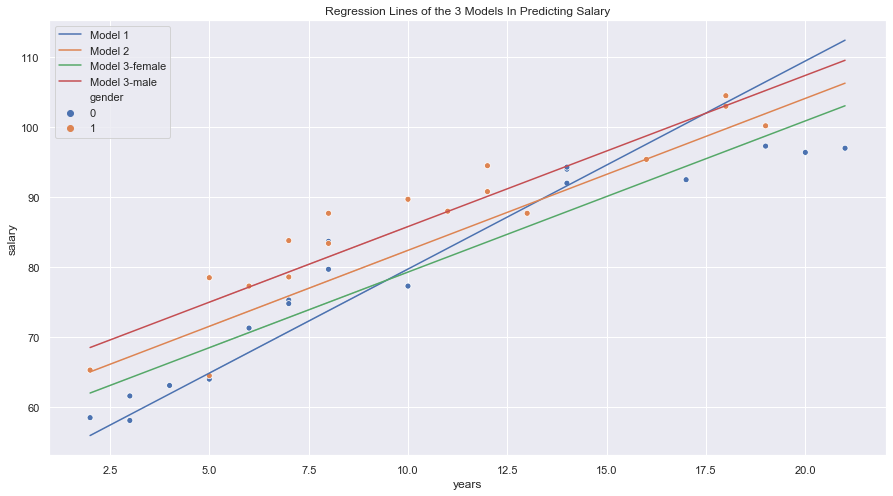

In [5]:
plt.figure(figsize=(15,8))
sns.lineplot(x="years", y=50+2.973*data["years"], data=data, label='Model 1')
sns.lineplot(x="years", y=60.698+2.171*data['years'], data=data, label='Model 2')
# sns.lineplot(x="years", y=57.7+(2.16*data['years'])+(6.5*data['gender']),hue="gender", data=data) 
sns.lineplot(x="years", y=57.7+(2.16*(data['years'])),data=data, label ='Model 3-female')
sns.lineplot(x="years", y=57.7+(2.16*data['years'])+6.5, data=data, label ='Model 3-male')
sns.scatterplot(x="years", y="salary", hue="gender", data=data)
plt.title("Regression Lines of the 3 Models In Predicting Salary")
# sns.lineplot(x="years", y=57.7+(2.16*data['years'])+(6.5*(data['gender']==0)), data=data)
# sns.lineplot(x="years", y=57.7+(2.16*data['years'])+(6.5*(data['gender']==1)), data=data)